In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
 

In [6]:
df = pd.read_csv('developer_dataset.csv')
 
print(df.columns)
print(df.count())
df.describe()

C:\Users\Floward\AppData\Local\Temp\ipykernel_15920\569611071.py:3: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('developer_dataset.csv')


Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs', 'NEWJobHunt',
       'NEWJobHuntResearch', 'NEWLearn'],
      dtype='object')
RespondentID              111209
Year                      111209
Country                   111209
Employment                109425
UndergradMajor             98453
DevType                   100433
LanguageWorkedWith        102018
LanguageDesireNextYear     96044
DatabaseWorkedWith         85859
DatabaseDesireNextYear     74234
PlatformWorkedWith         91609
PlatformDesireNextYear     85376
Hobbyist                   68352
OrgSize                    54804
YearsCodePro               94793
JobSeek                    60556
ConvertedComp              91333
WorkWeekHrs           

RespondentID           Year  YearsCodePro  ConvertedComp   WorkWeekHrs
count  111209.000000  111209.000000  94793.000000   9.133300e+04  51089.000000
mean    19262.039709    2018.854832      9.547045   1.251777e+05     41.051670
std     11767.011322       0.777503      7.548931   2.461218e+05     13.833929
min         1.000000    2018.000000      0.000000   0.000000e+00      1.000000
25%      9268.000000    2018.000000      4.000000   4.600000e+04     40.000000
50%     18535.000000    2019.000000      8.000000   7.900000e+04     40.000000
75%     28347.000000    2019.000000     14.000000   1.200000e+05     42.000000
max     42857.000000    2020.000000     50.000000   2.000000e+06    475.000000

Check how many missing columns are there

In [7]:
maxRows = df['RespondentID'].count()

print('% Missing Data: ')
print((1-df.count() / maxRows) * 100)

% Missing Data: 
RespondentID               0.000000
Year                       0.000000
Country                    0.000000
Employment                 1.604187
UndergradMajor            11.470295
DevType                    9.689863
LanguageWorkedWith         8.264619
LanguageDesireNextYear    13.636486
DatabaseWorkedWith        22.794918
DatabaseDesireNextYear    33.248208
PlatformWorkedWith        17.624473
PlatformDesireNextYear    23.229235
Hobbyist                  38.537349
OrgSize                   50.719816
YearsCodePro              14.761395
JobSeek                   45.547573
ConvertedComp             17.872654
WorkWeekHrs               54.060373
NEWJobHunt                82.800852
NEWJobHuntResearch        83.200101
NEWLearn                  78.215792
dtype: float64


Based on the previous output we can see that 
NewJobHunt, NewJobHuntResearch, NewLearn 
have the highest percentage of missing values.
It is safe to remove those columns

In [8]:
df.drop(['NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn'], axis=1, inplace=True)

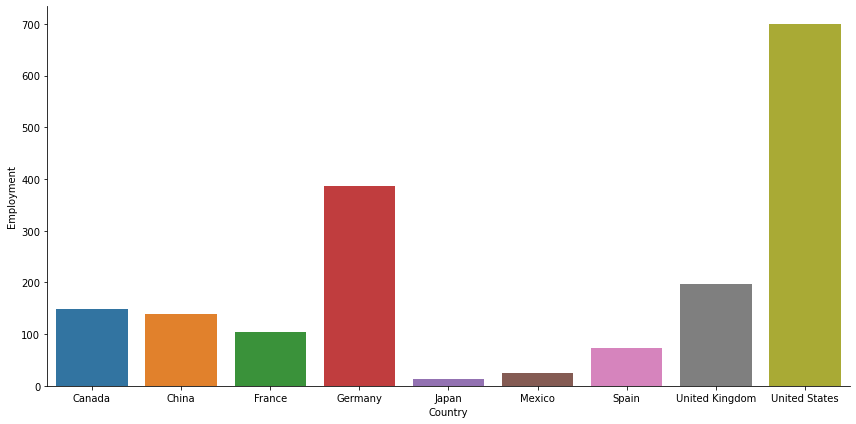

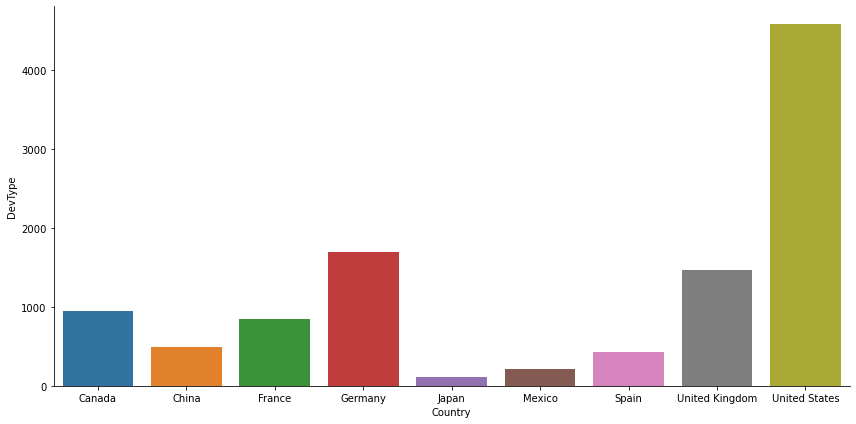

In [10]:
df[['RespondentID', 'Country']].groupby('Country').count()

missingData = df[['Employment', 'DevType']].isnull().groupby(df['Country']).sum().reset_index()

A = sns.catplot(data=missingData, kind="bar", x="Country", y="Employment", height=6, aspect=2)
B = sns.catplot(data=missingData, kind="bar", x="Country", y="DevType", height=6, aspect=2)

There is more missing data in the United States in comparison to Japan because there are more residents there.
Note that the United States and Germany have significantly more developers (on average) than the other countries, explaining why they have more missing data points. The missing data for these two columns can be categorized as MCAR. 
We can safely remove the missing data in these columns. Use Pairwise Deletion.

In [11]:
df.dropna(subset=['Employment', 'DevType'], inplace=True, how='any')

Analyze the distribution of employment and developer types by country. 
Aggregate the employment data by key developer roles that align with major parts of the development lifecycle.

C:\Users\Floward\AppData\Local\Temp\ipykernel_15920\345711393.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devdf.loc[devdf['DevType'].str.contains('back-end'), 'BackEnd'] = True
C:\Users\Floward\AppData\Local\Temp\ipykernel_15920\345711393.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devdf.loc[devdf['DevType'].str.contains('front-end'), 'FrontEnd'] = True
C:\Users\Floward\AppData\Local\Temp\ipykernel_15920\345711393.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

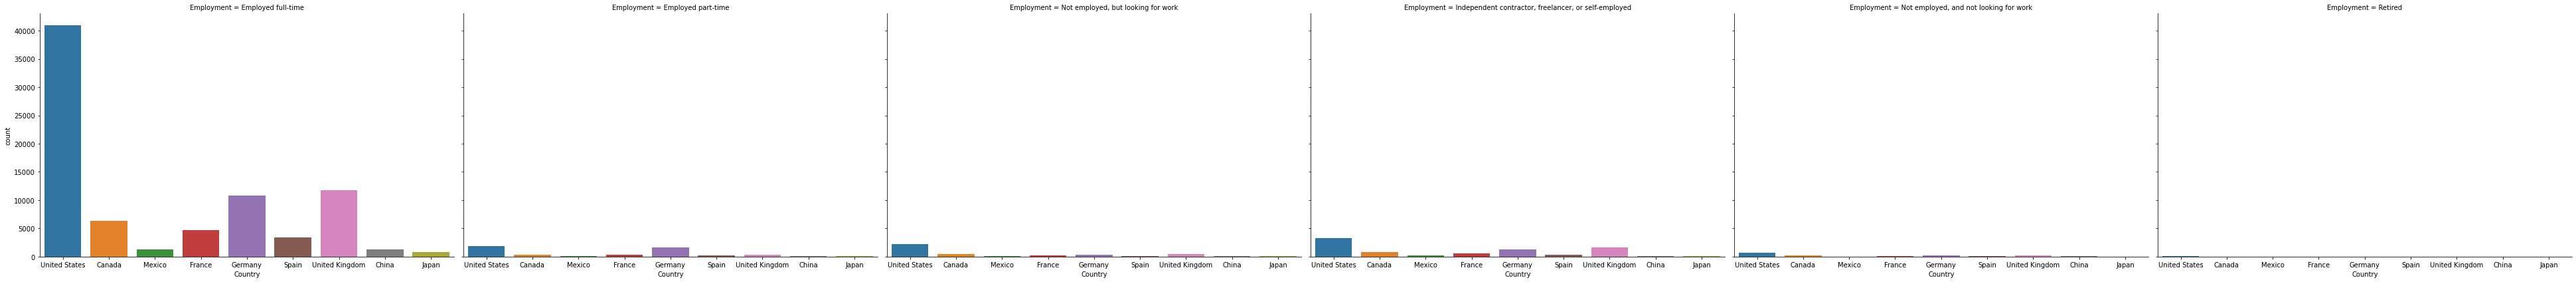

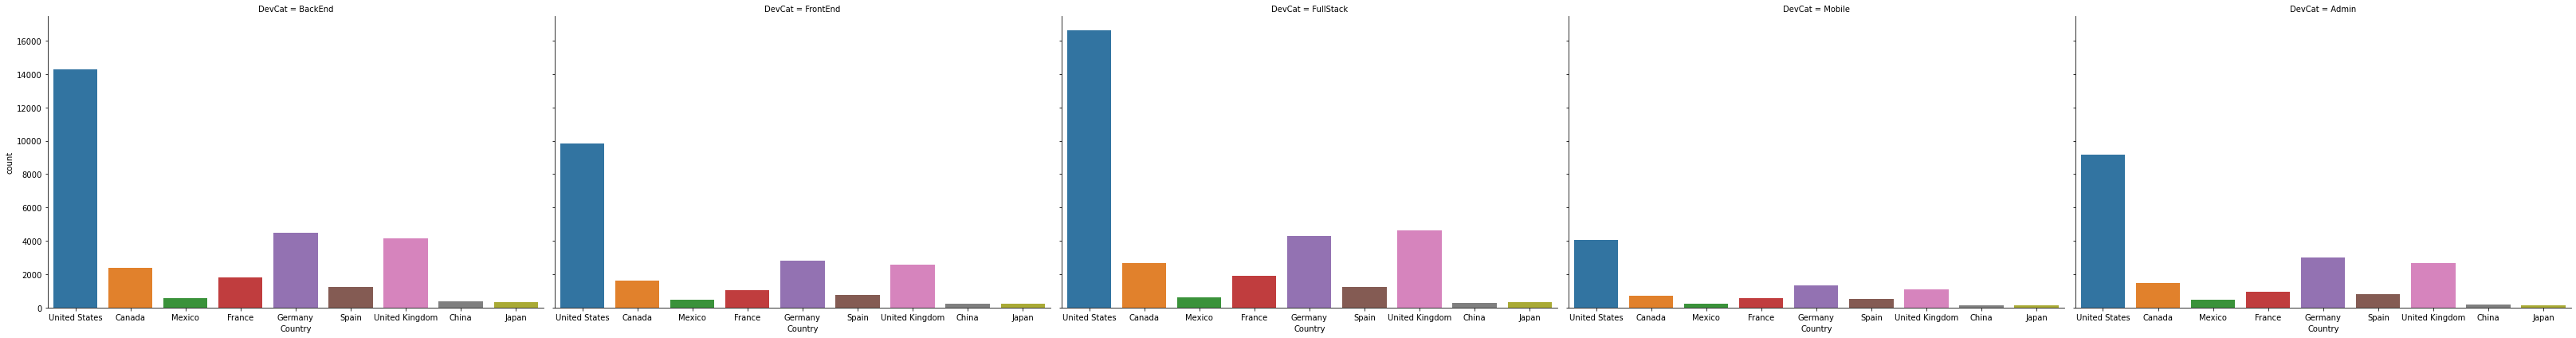

In [17]:
empfig = sns.catplot(x="Country", col="Employment",
                data=df, kind="count",
                height=6, aspect=1.5)


# Focus on a few of the key developer types outlined in the stack overflow survey
devdf = df[['Country','DevType']]
devdf.loc[devdf['DevType'].str.contains('back-end'), 'BackEnd'] = True
devdf.loc[devdf['DevType'].str.contains('front-end'), 'FrontEnd'] = True
devdf.loc[devdf['DevType'].str.contains('full-stack'), 'FullStack'] = True
devdf.loc[devdf['DevType'].str.contains('mobile'), 'Mobile'] = True
devdf.loc[devdf['DevType'].str.contains('administrator'), 'Admin'] = True
 
devdf = devdf.melt(id_vars=['Country'], 
    value_vars=['BackEnd','FrontEnd','FullStack','Mobile','Admin'], 
    var_name='DevCat',
    value_name='DevFlag')


devdf.dropna(how='any', inplace=True)

devFig = sns.catplot(x="Country", col="DevCat",
                     data=devdf, kind="count",
                     height=6, aspect=1.5)

Investigate developer undergraduate majors

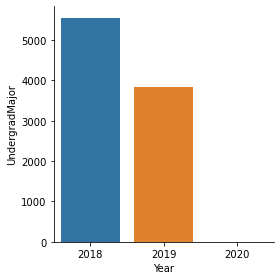

In [18]:
missingUndergrad = df['UndergradMajor'].isnull().groupby(df['Year']).sum().reset_index()
 
sns.catplot(x="Year", y="UndergradMajor",
                data=missingUndergrad, kind="bar",
                height=4, aspect=1)

Fill in the gaps using NOCB:

In [19]:
# Sort by ID and Year so that each person's data is carried backwards correctly
df = df.sort_values(['RespondentID','Year'])
 
df['UndergradMajor'].bfill(axis=0, inplace=True)

Analyze the major distribution for each year

C:\Users\Floward\AppData\Local\Temp\ipykernel_15920\439029384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edudf.dropna(how='any', inplace=True)
C:\Users\Floward\AppData\Local\Temp\ipykernel_15920\439029384.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edudf.loc[edudf['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
C:\Users\Floward\AppData\Local\Temp\ipykernel_15920\439029384.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

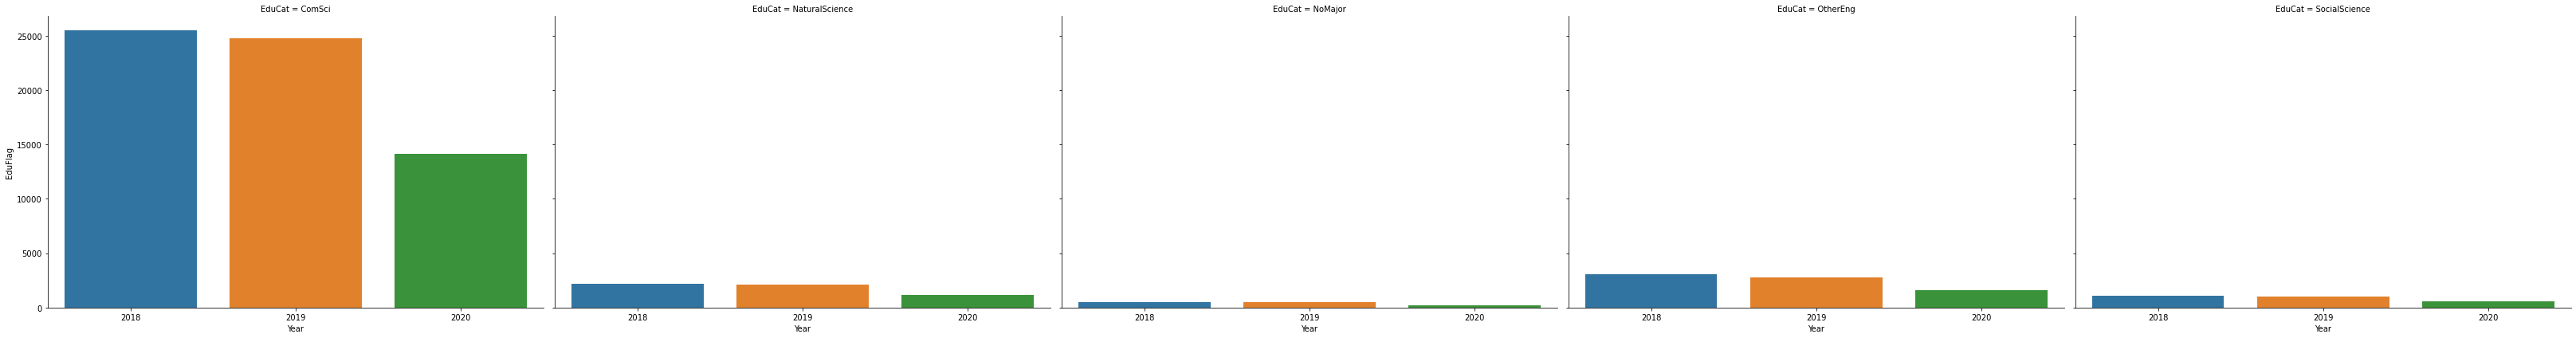

In [21]:
# Key major groups outlined in the Stack Overflow survey
majors = ['social science','natural science','computer science','development','another engineering','never declared']
 
edudf = df[['Year','UndergradMajor']]
edudf.dropna(how='any', inplace=True)
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)natural science'), 'NaturalScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)computer science'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)development'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)another engineering'), 'OtherEng'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)never declared'), 'NoMajor'] = True
 
edudf = edudf.melt(id_vars=['Year'], 
    value_vars=['SocialScience','NaturalScience','ComSci','OtherEng','NoMajor'], 
    var_name='EduCat',
    value_name='EduFlag')
 
edudf.dropna(how='any', inplace=True)
edudf = edudf.groupby(['Year','EduCat']).count().reset_index()
 
eduFig = sns.catplot(x="Year", y='EduFlag', col="EduCat",
                data=edudf, kind="bar",
                height=6, aspect=1.5)

Examine the relationship between years of experience and compensation

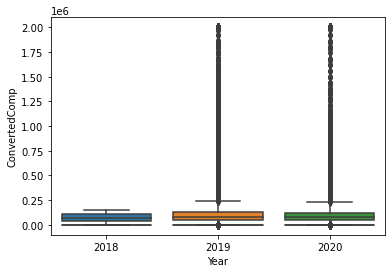

In [22]:
compFields = df[['Year','YearsCodePro','ConvertedComp']]
 
D = sns.boxplot(x="Year", y="YearsCodePro",
            data=compFields)
 
E = sns.boxplot(x="Year", y="ConvertedComp",
            data=compFields)

You see that although there are some outlier data points for each column, 
the overall distribution is fairly consistent year-over-year. 
This indicates that there is a strong correlation between the data points, 
which should tell a good story about how experience can translate into compensation. 
Since there is a clear trend with the data points, 
you decide the best method for filling in the missing data for these two columns is through Multiple Imputation:

In [24]:
imputedf = df[['YearsCodePro','ConvertedComp']]
 
traindf, testdf = train_test_split(imputedf, train_size=0.1)
 
# Create the IterativeImputer model to predict missing values
imp = IterativeImputer(max_iter=20, random_state=0)
 
# Fit the model to the the test dataset
imp.fit(imputedf)
 
# Transform the model on the entire dataset
compdf = pd.DataFrame(np.round(imp.transform(imputedf),0), columns=['YearsCodePro','ConvertedComp'])

analyze the relationship between YearsCodePro and CinvertedComp through the use of a boxplot

C:\Users\Floward\AppData\Local\Temp\ipykernel_15920\2851799836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5)


<AxesSubplot:xlabel='CodeYearBins', ylabel='ConvertedComp'>

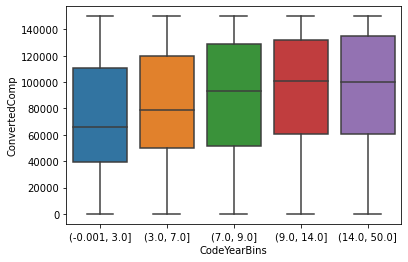

In [25]:
compPlotdf = compdf.loc[compdf['ConvertedComp'] <= 150000]
compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5)
 
sns.boxplot(x="CodeYearBins", y="ConvertedComp",
            data=compPlotdf)